<a href="https://colab.research.google.com/github/Hitarth-Vyas/MiniProj-SOWNA/blob/main/mini_project29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

import sys
import math

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

import csv
# filename = "/content/sample_data/ue_data.csv"
filename = "/content/CMC_dataset.csv"
ratfile = "/content/rat_qos.csv"

#Data

In [ ]:
import random
from numpy import sqrt
a=0
b=1000
def goodRand(density):
  goodPoints = []
  for _ in range(density):
    x= random.randint(a,b+1)
    y= random.randint(a,b+1)
    z= random.uniform(-100,-60)
    goodPoints.append([x,y,z,1])
  return goodPoints

def badRand(clusterPoints,density,radius):
  randomPoints = []
  badPoints = []
  for _ in range(clusterPoints):
    x= random.randint(a,b+1)
    y= random.randint(a,b+1)
    randomPoints.append([x,y])
  for x,y in randomPoints:
    for _ in range(density):
      x1 = random.uniform(x-(radius/2),x+(radius/2))
      y1 = random.uniform(y-(radius/2),y+(radius/2))
      z = random.uniform(-120,-100)
      badPoints.append([x1,y1,z,0])
  return badPoints,randomPoints

def uniqueRand(overallDensity,clusterPoints,density,radius,min,max,dispersionFactor):
  randomPoints = []
  badPoints = []
  Points = []
  for _ in range(clusterPoints):
    while True:
      x= random.randint(a,b+1)
      y= random.randint(a,b+1)
      unique = True
      for x_,y_ in randomPoints:
        if sqrt((x_-x)**2 + (y_ -y)**2) <= radius*dispersionFactor:
          unique = False
          break
      if unique == True:
        randomPoints.append([x,y])
        break
  for _ in range(overallDensity):
    x= random.randint(min,max+1)
    y= random.randint(min,max+1)
    bad = False
    for point in randomPoints:
      x1 = point[0]
      y1 = point[1]
      if(x1-radius < x < x1+ radius and y1-radius < y < y1+radius):
        bad = True
        break
    if bad == False:
      z= random.uniform(-100,-60)
      classification = 0
    else:
      z = random.uniform(-120,-100)
      classification = 1
    Points.append([x,y,z,classification])
  return Points

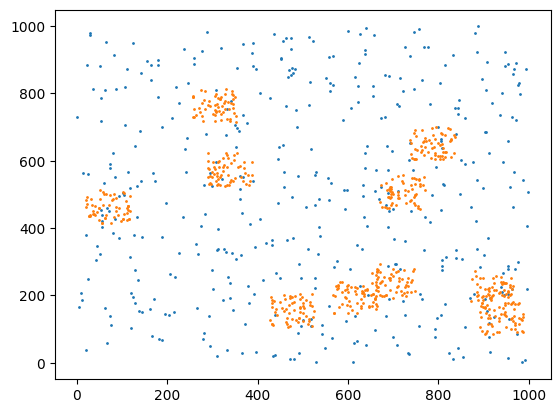

In [ ]:
import matplotlib.pyplot as plt

pointsA = goodRand(440)
pointsB,filterOut = badRand(10,60,100)

X_a = [row[0] for row in pointsA]
Y_a = [row[1] for row in pointsA]
X_b = [row[0] for row in pointsB]
Y_b = [row[1] for row in pointsB]

plt.scatter(X_a,Y_a,s=1)
plt.scatter(X_b,Y_b,s=1)
plt.show()

In [ ]:
myPoints = uniqueRand(8800,5,700,70,0,1000,2.5)

gandePoints = 0
for point in myPoints:
  if point[3] == 1:
    gandePoints += 1
print(gandePoints)

783


8800
8800


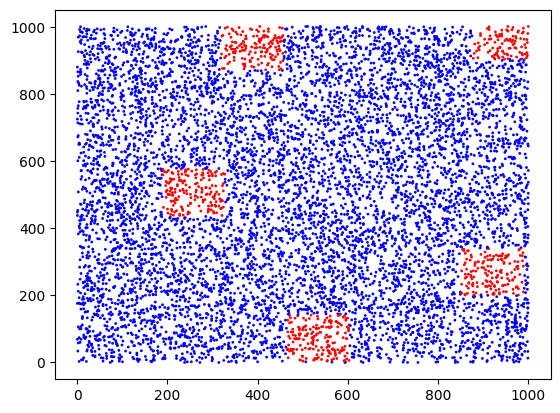

In [ ]:
col=[]
for point in myPoints:
    if point[3]==0:
      col.append('blue')
    else:
      col.append('red')

print(len(col))
print(len(myPoints))
#scatter plot
X_a = [row[0] for row in myPoints]
Y_a = [row[1] for row in myPoints]
plt.scatter(X_a,Y_a,c=col,s=1)
# for i in range(len(myPoints)):
    # plt.scatter(myPoints[i][0],myPoints[i][1],c=col[i],s=2, linewidth=0)
plt.show()


In [ ]:
import pandas as pd

df = pd.DataFrame(myPoints)
df.columns =['X','Y','RSSP','Category']
# print(df)
df.to_csv('/content/CMC_dataset.csv',index=False)

In [ ]:
df = pd.read_csv(filename)
rdf = pd.read_csv(ratfile)
# df
# rdf

In [ ]:
# u1 = np.random.randint(-200, -44, size=9999)
# u2 = np.random.randint(-200, -44, size=9999)
# u3 = np.random.randint(-200, -44, size=9999)


In [ ]:
# x = np.random.randint(0, 100, size=9999)
# y = np.random.randint(0, 100, size=9999)
# points=[]

# for i in range(1000):
#     point = (int(x), int(y))
#     points.append(point)



In [ ]:
# data = {'x': x,
#         'y': y,
#         'u1': u1,
#         'u2': u2,
#         'u3': u3}

In [ ]:
# df = pd.DataFrame(data)

# df.to_csv(filename)

In [ ]:
# uedata = pd.read_csv(filename, usecols=['u1', 'u2', 'u3']).values

# average = [round(sum(row)/len(row), 2) for row in uedata]


# data['average'] = average

In [ ]:
# df = pd.DataFrame(data)

# df.to_csv(filename)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Elbow Method

In [ ]:
# average = pd.read_csv(filename, usecols=['x', 'y', 'average']).values.tolist()


filtered_df = df.loc[(df['RSSP'] < -115)]

rssp = filtered_df['RSSP'].values.tolist()

average = sum(rssp)/len(rssp)

# rssp

average

# filtered_df = filtered_df.filter(items=['x', 'y', 'average'])

# len(filtered_df)
# len(df['RSSP'])

# data = filtered_df
filtered_df

,X,Y,RSSP,Category
27,875,314,-119.477768,1
105,467,126,-115.022664,1
116,932,241,-116.840609,1
189,302,450,-116.767977,1
246,1001,1001,-117.282085,1
...,...,...,...,...
8636,324,463,-119.309411,1
8680,480,28,-118.149593,1
8705,285,521,-116.976647,1
8761,883,295,-119.707437,1


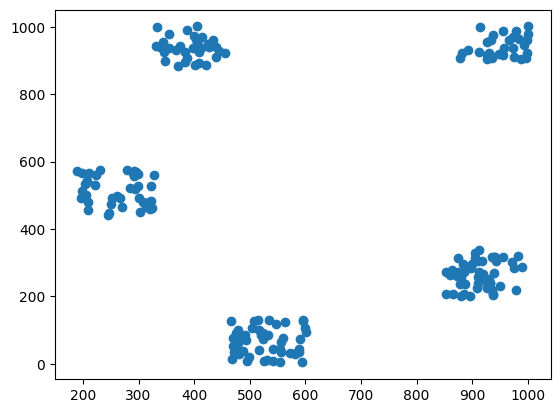

In [ ]:
# plt.figure(figsize=(10, 10))

plt.scatter(filtered_df['X'], filtered_df['Y'])

In [ ]:
x = filtered_df['X'].tolist()
y = filtered_df['Y'].tolist()

data = np.array(list(zip(x, y))).reshape(len(x), 2)
inertias = []
distortions = []
imap = {}
dmap = {}

for i in range(1,21):
    kmeans = KMeans(n_clusters=i).fit(data)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(data, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / data.shape[0])
    dmap[i] = sum(np.min(cdist(data, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / data.shape[0]
    imap[i] = kmeans.inertia_

In [ ]:
for key, val in dmap.items():
    print(f'{key} : {val}')

1 : 435.49258164662365
2 : 283.0309937179364
3 : 194.74832120981839
4 : 113.99964122485598
5 : 50.18414722367023
6 : 46.77381017299753
7 : 43.88828457503598
8 : 40.63875391622633
9 : 38.45970216705394
10 : 36.542931741654925
11 : 34.3749037014735
12 : 32.7764020731157
13 : 31.326673902344673
14 : 29.071863077672177
15 : 28.262618712152754
16 : 26.79675782636216
17 : 25.37084484017242
18 : 24.652334444037724
19 : 23.99251103912786
20 : 22.952305967100866


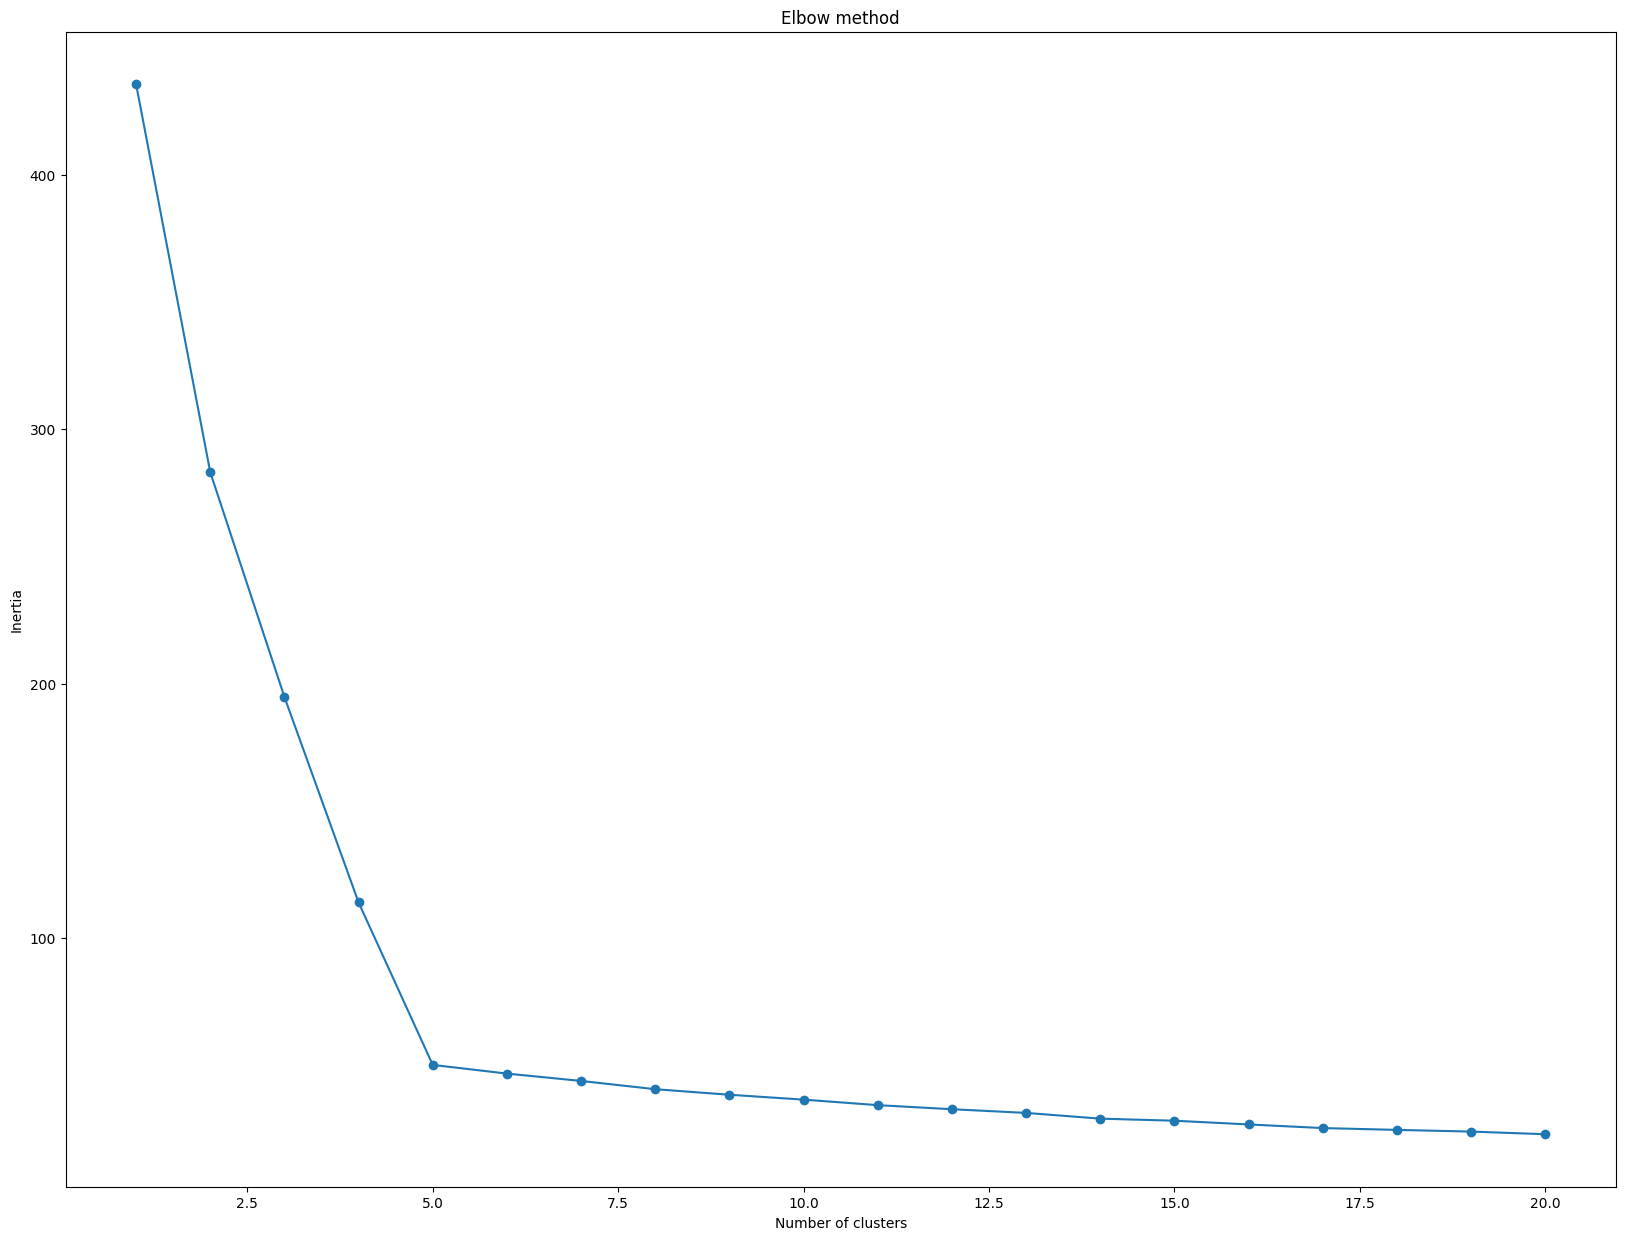

In [ ]:
plt.figure(figsize=(20, 15))

plt.plot(range(1,21), distortions, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.show()

In [ ]:
# kkmeans = KMeans(n_clusters=5)
# kmeans.fit(data)

# plt.figure(figsize=(10, 10))

# plt.scatter(x, y, c=kmeans.labels_)
# plt.show()

# K Means Cluster

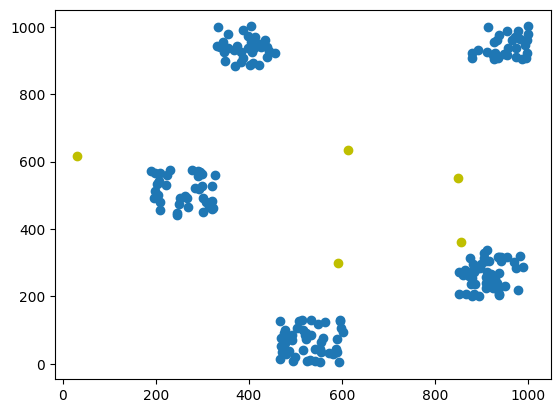

In [ ]:
k=5

centroids = {
    i+1: [np.random.uniform(0, 1000), np.random.uniform(0, 1000)]
    for i in range(k)
}

plt.scatter(filtered_df['X'], filtered_df['Y'])
colmap = {
    1:'y', 2:'y', 3:'y', 4:'y', 5:'y'
}

for i in centroids.keys():
  plt.scatter(*centroids[i], color='y')

plt.show()

<ipython-input-22-d21881405314>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['distance_from_{}'.format(i)] = (
<ipython-input-22-d21881405314>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['distance_from_{}'.format(i)] = (
<ipython-input-22-d21881405314>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

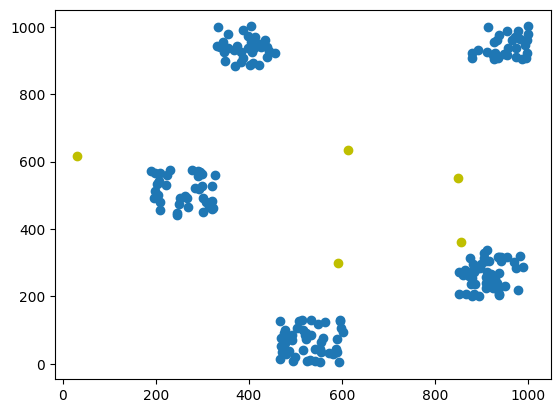

In [ ]:
def assignment(df, centroids):
  for i in centroids.keys():
    filtered_df['distance_from_{}'.format(i)] = (
        np.sqrt(
            (filtered_df['X'].astype('float') - centroids[i][0]) ** 2
            + (filtered_df['Y'].astype('float') - centroids[i][1]) ** 2
        )
    )

  centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
  filtered_df['closest'] = filtered_df.loc[:, centroid_distance_cols].idxmin(axis=1)
  filtered_df['closest'] = filtered_df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
  filtered_df['color'] = filtered_df['closest'].map(lambda x: 'y')
  return filtered_df

filtered_df = assignment(filtered_df, centroids)
# print(filtered_df.head())

plt.scatter(filtered_df['X'], filtered_df['Y'])
for i in centroids.keys():
  plt.scatter(*centroids[i], color='y')

plt.show()

In [ ]:
filtered_df

In [ ]:
# import copy

# # print(type(centroids))
old_centroids = centroids.copy()

def update(k):
  for i in centroids.keys():
    centroids[i][0] = np.mean(filtered_df.loc[filtered_df['closest']==i]['X'])
    centroids[i][1] = np.mean(filtered_df.loc[filtered_df['closest']==i]['Y'])
  return k

centroids = update(centroids)
# print(centroids)
# print(old_centroids)

<ipython-input-22-d21881405314>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['distance_from_{}'.format(i)] = (
<ipython-input-22-d21881405314>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['closest'] = filtered_df.loc[:, centroid_distance_cols].idxmin(axis=1)
<ipython-input-22-d21881405314>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

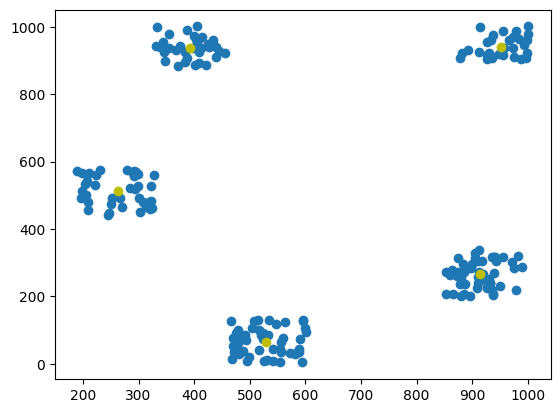

In [ ]:
while True:
  closest_centroids = filtered_df['closest'].copy(deep=True)
  centroids = update(centroids)
  filtered_df = assignment(filtered_df, centroids)
  if closest_centroids.equals(filtered_df['closest']):
    break

plt.scatter(filtered_df['X'], filtered_df['Y'])
for i in centroids.keys():
  plt.scatter(*centroids[i], color='y')

plt.show()

In [ ]:
# centroids

In [ ]:
# rdist = []
rat = rdf['RAT'].tolist()
qos = rdf['QoS'].tolist()
rmap = {}

for i in rat:
  # rdist.append(np.linalg.norm(q - average))
  rmap[i] = np.linalg.norm(qos[i-1] - average)

# rdist
rmap

temp = min(rmap.values())
res = [key for key in rmap if rmap[key] == temp]

res

[2]

#GMM

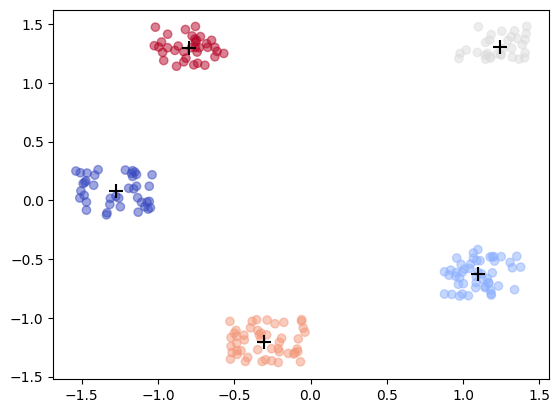

array([[-1.27551889,  0.08312352],
       [ 1.09916586, -0.63090603],
       [ 1.24141253,  1.30692707],
       [-0.30214846, -1.20309749],
       [-0.79766285,  1.29869431]])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture



# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_df[['X', 'Y']])

# Build the GMM model
gmm = GaussianMixture(n_components=5, covariance_type='full', init_params='k-means++')
# gmm = GaussianMixture(n_components=5, covariance_type='full', init_params='random')

# Fit the GMM model
gmm.fit(scaled_data)

# Predict the cluster labels
labels = gmm.predict(scaled_data)

centroids = gmm.means_

# Visualize the results
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], alpha=0.5, c=labels, cmap='coolwarm')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, marker='+', color='black', label='Centroids')
plt.show()

centroids

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-30-bb27112f81c0>:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(scaled_data[:, 0], scaled_data[:, 1], alpha=0.5, cmap='coolwarm')


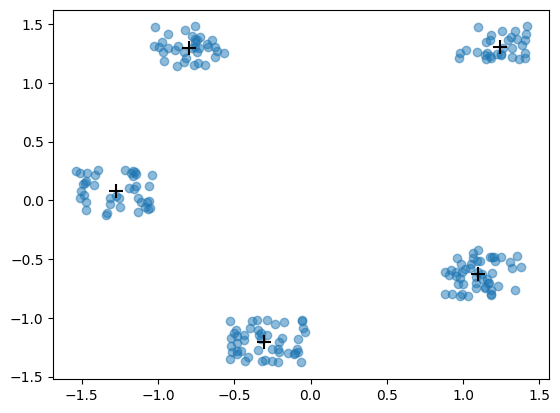

array([[ 1.09916586, -0.63090603],
       [-1.27551889,  0.08312352],
       [ 1.24141253,  1.30692707],
       [-0.30214846, -1.20309749],
       [-0.79766285,  1.29869431]])

In [ ]:
# Create a KMeans object with 3 clusters
kmeans = KMeans(n_clusters=5)

# Fit the KMeans object to the data
kmeans.fit(scaled_data)

# Get the labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

kmeans = KMeans(n_clusters=5)


# fit the k-means algorithm to the data
kmeans.fit(scaled_data)

# get the cluster labels for each data point
labels = kmeans.labels_

# get the centroids of each cluster
centroids = kmeans.cluster_centers_
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], alpha=0.5, cmap='coolwarm')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, marker='+', color='black', label='Centroids')
plt.show()

centroids

Optimal number of clusters based on BIC: 5
Optimal number of clusters based on AIC: 9


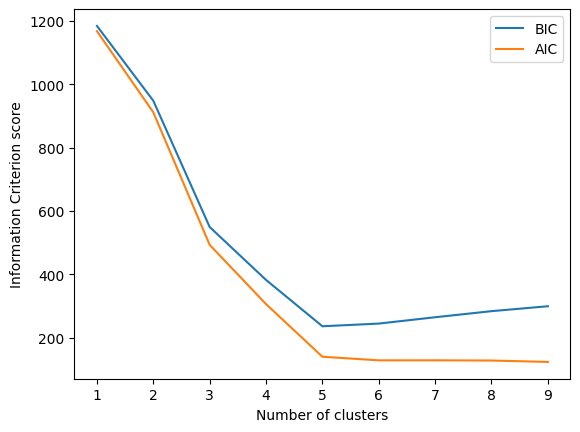

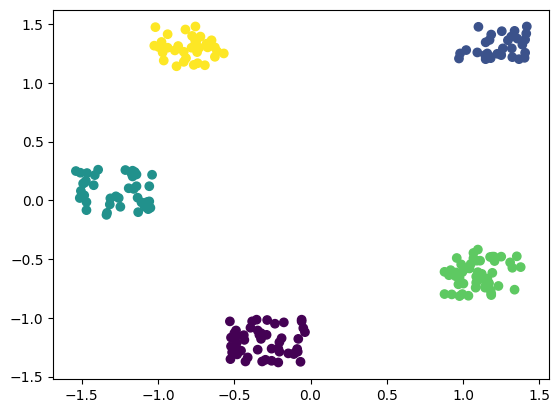

In [ ]:
# %% [code]
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# # Generate sample data
# np.random.seed(0)
# X = np.concatenate((np.random.randn(100, 2), 10 + np.random.randn(300, 2),
#                     -5 + np.random.randn(200, 2)))

# Fit GMM models with different number of clusters
n_components_range = range(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(scaled_data) for n in n_components_range]

# Calculate the BIC and AIC scores for each model
bic_scores = [model.bic(scaled_data) for model in models]
aic_scores = [model.aic(scaled_data) for model in models]

# Find the optimal number of clusters based on BIC and AIC scores
n_components_bic = n_components_range[np.argmin(bic_scores)]
n_components_aic = n_components_range[np.argmin(aic_scores)]

print("Optimal number of clusters based on BIC: %d" % n_components_bic)
print("Optimal number of clusters based on AIC: %d" % n_components_aic)

# Plot the BIC and AIC scores as a function of the number of clusters
plt.plot(n_components_range, bic_scores, label='BIC')
plt.plot(n_components_range, aic_scores, label='AIC')
plt.legend(loc='best')
plt.xlabel('Number of clusters')
plt.ylabel('Information Criterion score')
plt.show()

# Fit the GMM model with the optimal number of clusters
gmm = GaussianMixture(n_components=n_components_bic, covariance_type='full', random_state=0)
labels = gmm.fit_predict(scaled_data)

# Plot the results
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis')
plt.show()